# Load and Preprocess Data

In [47]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/Users/noah/Desktop/Work on Resume/adult/adult.data', header=None)  # Specify header=None if there’s no header row

# Define column names since the dataset doesn't include a header row
df.columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']

# Strip extra spaces from column names
df.columns = df.columns.str.strip()

# Inspect the first few rows of the dataset
print(df.head())

# Check the columns and their names to ensure there's no mismatch
print(df.columns)

   age          workclass  fnlwgt   education  education-num  \
0   39          State-gov   77516   Bachelors             13   
1   50   Self-emp-not-inc   83311   Bachelors             13   
2   38            Private  215646     HS-grad              9   
3   53            Private  234721        11th              7   
4   28            Private  338409   Bachelors             13   

        marital-status          occupation    relationship    race      sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

   capital-gain  capital-loss  hours-per-week  native-country  income  
0          2174             0              40   United-States   <=50

# Check for Missing Data

In [48]:

# Impute missing values (if any) for categorical columns with the most frequent value
from sklearn.impute import SimpleImputer

# Define an imputer for numerical and categorical features
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Impute numerical and categorical columns
numerical_imputer = SimpleImputer(strategy='mean')
categorical_imputer = SimpleImputer(strategy='most_frequent')

df[numerical_cols] = numerical_imputer.fit_transform(df[numerical_cols])
df[categorical_cols] = categorical_imputer.fit_transform(df[categorical_cols])


# After imputation, check for missing values
print(df.isnull().sum())


age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64


#  Preprocessing

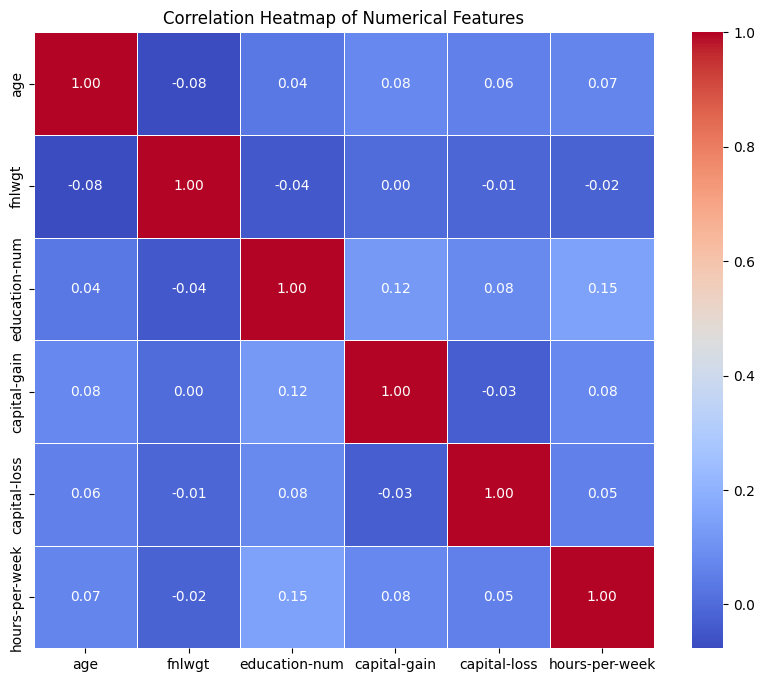

In [84]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import seaborn as sns


# Separate features (X) and target (y)
X = df.drop('income', axis=1)
y = df['income']

# Label encode the target variable 'income' (since it's categorical)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)  # Encode income as 0 (<=50K) and 1 (>50K)

# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(exclude=['object']).columns

# Preprocessing pipelines for both numerical and categorical features
numerical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),  # For missing numerical values
    ('scaler', StandardScaler())  # Scaling numerical features
])

categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),  # For missing categorical values
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))  # One-hot encoding for categorical features
])

# Combine both pipelines in a column transformer
preprocessor = ColumnTransformer([
    ('num', numerical_pipeline, numerical_cols),
    ('cat', categorical_pipeline, categorical_cols)
])

# Apply the preprocessor to the data
X_processed = preprocessor.fit_transform(X)

# Calculate the correlation matrix for the numerical features
correlation_matrix = X[numerical_cols].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

# Split the Data into Training and Test Sets

In [50]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split

# Ensure correct separation of features and target
X = df.drop('income', axis=1)
y = df['income']

# Check if the number of rows in X and y are equal
print(len(X), len(y))

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_processed, y_encoded, test_size=0.2, random_state=42)

# Check the shapes after the split
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)


32561 32561
(26048, 108) (26048,)
(6513, 108) (6513,)


#  Model Training and Evaluation

Accuracy: 0.8578228159066482
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.94      0.91      4942
           1       0.75      0.61      0.68      1571

    accuracy                           0.86      6513
   macro avg       0.82      0.77      0.79      6513
weighted avg       0.85      0.86      0.85      6513



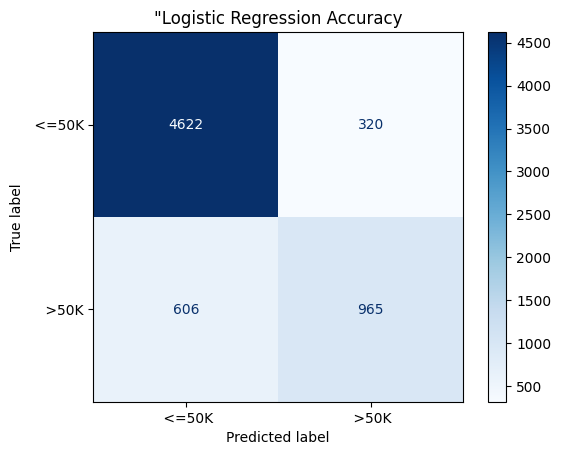

In [ ]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, classification_report

# Accuracy
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot(cmap='Blues')
plt.title('"Logistic Regression Accuracy')
plt.show()



Random Forest Accuracy: 0.8576692768309535
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.93      0.91      4942
           1       0.74      0.64      0.68      1571

    accuracy                           0.86      6513
   macro avg       0.81      0.78      0.80      6513
weighted avg       0.85      0.86      0.85      6513



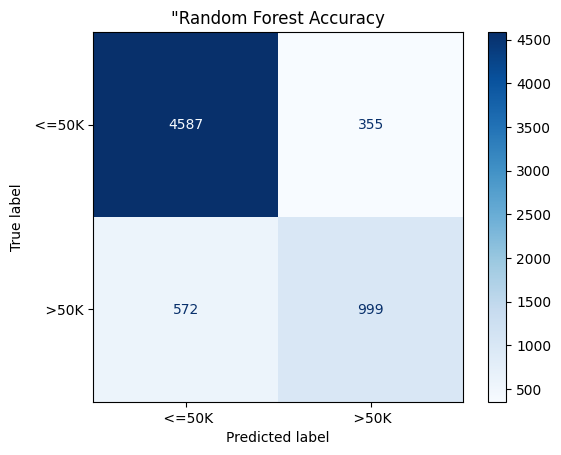

In [52]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, classification_report

# Evaluate the XGBoost model

# Accuracy
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))

# Classification Report
print("Classification Report:\n", classification_report(y_test, rf_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, rf_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot(cmap='Blues')
plt.title('"Random Forest Accuracy')
plt.show()


XGBoost Accuracy: 0.8739444188545985
XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.94      0.92      4942
           1       0.78      0.67      0.72      1571

    accuracy                           0.87      6513
   macro avg       0.84      0.80      0.82      6513
weighted avg       0.87      0.87      0.87      6513



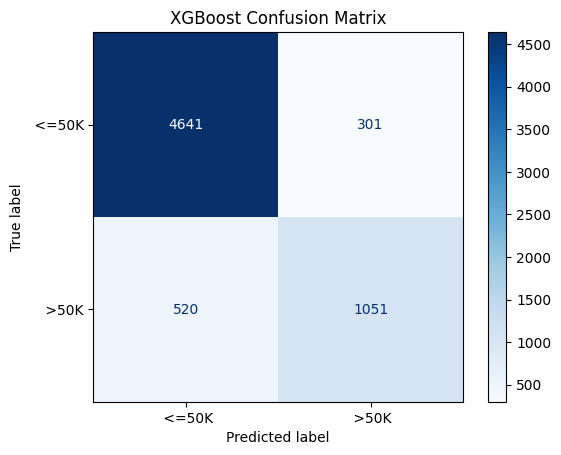

In [63]:
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, classification_report

# Evaluate the XGBoost model
# Accuracy
xgb_model = xgb.XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_xgb)
print("XGBoost Accuracy:", accuracy)

# Classification Report
print("XGBoost Classification Report:\n", classification_report(y_test, y_pred_xgb))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_xgb)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot(cmap='Blues')
plt.title('XGBoost Confusion Matrix')
plt.show()


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": xgb.XGBClassifier(random_state=42)
}
xgb.XGBClassifier(random_state=42)
# Train and evaluate models
results = {}

for model_name, model in models.items():
    # Fit the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Get accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    # Get classification report
    clf_report = classification_report(y_test, y_pred, output_dict=True)
    
    # Store the results
    results[model_name] = {
        "accuracy": accuracy,
        "classification_report": clf_report
    }

# Find the best model based on accuracy
best_model_name = max(results, key=lambda x: results[x]["accuracy"])
best_model = models[best_model_name]

print(f"The best model is: {best_model_name}")
print(f"Accuracy: {results[best_model_name]['accuracy']}")
print(f"Classification Report:\n{results[best_model_name]['classification_report']}")


The best model is: XGBoost
Accuracy: 0.8739444188545985
Classification Report:
{'0': {'precision': 0.8992443324937027, 'recall': 0.9390934844192634, 'f1-score': 0.9187370088092646, 'support': 4942.0}, '1': {'precision': 0.7773668639053254, 'recall': 0.6690006365372374, 'f1-score': 0.7191241874786178, 'support': 1571.0}, 'accuracy': 0.8739444188545985, 'macro avg': {'precision': 0.838305598199514, 'recall': 0.8040470604782504, 'f1-score': 0.8189305981439412, 'support': 6513.0}, 'weighted avg': {'precision': 0.8698462819559566, 'recall': 0.8739444188545985, 'f1-score': 0.8705884225494079, 'support': 6513.0}}


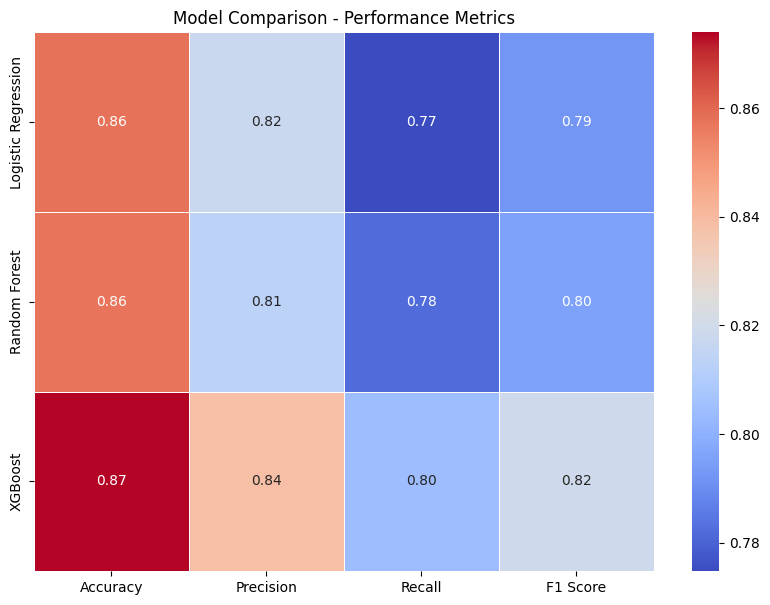

In [56]:
import seaborn as sns
import pandas as pd

# Create a DataFrame to hold the classification report
report_data = {}

for model_name, model in models.items():
    # Get classification report
    clf_report = classification_report(y_test, model.predict(X_test), output_dict=True)
    report_data[model_name] = clf_report['accuracy'], clf_report['macro avg']['precision'], clf_report['macro avg']['recall'], clf_report['macro avg']['f1-score']

# Convert the data to a DataFrame
report_df = pd.DataFrame.from_dict(report_data, orient='index', columns=['Accuracy', 'Precision', 'Recall', 'F1 Score'])

# Plot a heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(report_df, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Model Comparison - Performance Metrics')
plt.show()


In [57]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Hyperparameter tuning for XGBoost
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 200],
    'gamma': [0, 1, 5],
}

xgb_model = xgb.XGBClassifier(random_state=42)

# Grid search for hyperparameter tuning
grid_search = GridSearchCV(xgb_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_resampled, y_resampled)

# Best parameters
print("Best Parameters:", grid_search.best_params_)

# Predict with the tuned model
y_pred = grid_search.best_estimator_.predict(X_test)

# Evaluate the model
print("XGBoost Classification Report:\n", classification_report(y_test, y_pred))


Best Parameters: {'gamma': 0, 'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 200}
XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.90      0.91      4942
           1       0.71      0.75      0.73      1571

    accuracy                           0.86      6513
   macro avg       0.81      0.83      0.82      6513
weighted avg       0.87      0.86      0.87      6513



In [67]:
# Retrieve feature importance from the trained XGBoost model
importances = xgb_model.feature_importances_

# Get the feature names (after one-hot encoding)
encoded_feature_names = numerical_cols.tolist() + list(preprocessor.transformers_[1][1]['onehot'].get_feature_names_out(categorical_cols))

# Create a DataFrame to hold the feature importances
feature_importance_df = pd.DataFrame({
    'Feature': encoded_feature_names,
    'Importance': importances
})

# Sort the features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the top 10 most important features
print(feature_importance_df.head(10))


                               Feature  Importance
33  marital-status_ Married-civ-spouse    0.524894
2                        education-num    0.037733
3                         capital-gain    0.037418
56             relationship_ Own-child    0.024053
46           occupation_ Other-service    0.021764
4                         capital-loss    0.017134
51            occupation_ Tech-support    0.013087
42         occupation_ Exec-managerial    0.013015
43         occupation_ Farming-fishing    0.011071
38                       occupation_ ?    0.008657
